---
title: "Practice Activity – 8.1"
author: "Shiqi Wu"
format:
  html:
    toc: true
    code-fold: false
    df-print: paged
execute:
  echo: true
  warning: false
  message: false
jupyter: python3
---

**Repository:** <https://github.com/shiqiwu212/GSB-S544-01/tree/66cd5125fab227c74d49978902a1be646d529f15/Week%208/Practice%20Activities/Practice%20Activity%208.1>

# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [2]:
#Set Up
import pandas as pd
import numpy as np
from palmerpenguins import load_penguins

In [3]:
penguins = load_penguins()
df = penguins.dropna(subset=["bill_depth_mm"])    

In [8]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [4]:
X = df.drop(columns=["bill_depth_mm"])
y = df["bill_depth_mm"]

In [5]:
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()

print("Categorical columns to dummify:", cat_cols)
print("Numeric columns:", num_cols)

Categorical columns to dummify: ['species', 'island', 'sex']
Numeric columns: ['bill_length_mm', 'flipper_length_mm', 'body_mass_g', 'year']


Answer: We need to dummify the categorical predictors.
In this dataset, they are typically species, island, and sex.
All other predictors are numeric and do not require dummification.

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [20]:
#Set Up
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [21]:
# Four polynomial models: linear regression, degree 2 polynomial, degree 3 polynomial, and degree 10 polynomial.
# Source: Chapter 13.3.1 (PolynomialFeatures + LinearRegression in a Pipeline)
X_single = X[["bill_length_mm"]].to_numpy()   # (n,1) numeric
y_vec    = y.to_numpy() if hasattr(y, "to_numpy") else y

lin_model = Pipeline([
    ("poly", PolynomialFeatures(degree=1, include_bias=False)),
    ("lr", LinearRegression())
])

quad_model = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("lr", LinearRegression())
])

cubic_model = Pipeline([
    ("poly", PolynomialFeatures(degree=3, include_bias=False)),
    ("lr", LinearRegression())
])

deg10_model = Pipeline([
    ("poly", PolynomialFeatures(degree=10, include_bias=False)),
    ("lr", LinearRegression())
])

lin_model.fit(X_single, y_vec)
quad_model.fit(X_single, y_vec)
cubic_model.fit(X_single, y_vec)
deg10_model.fit(X_single, y_vec)

,steps,"[('poly', ...), ('lr', ...)]"
,transform_input,None
,memory,None
,verbose,False
,degree,10
,interaction_only,False
,include_bias,False
,order,'C'
,fit_intercept,True
,copy_X,True
,tol,1e-06


* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

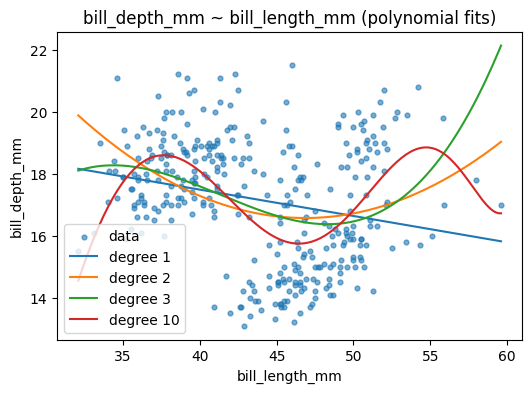

In [22]:
#Set up
import matplotlib.pyplot as plt

x_grid = np.linspace(X_single.min(), X_single.max(), 200).reshape(-1, 1)

y_lin   = lin_model.predict(x_grid)
y_quad  = quad_model.predict(x_grid)
y_cubic = cubic_model.predict(x_grid)
y_d10   = deg10_model.predict(x_grid)

# Scatter + four fitted curves
plt.figure(figsize=(6,4))
plt.scatter(X_single, y, s=12, alpha=0.6, label="data")
plt.plot(x_grid, y_lin,   label="degree 1")
plt.plot(x_grid, y_quad,  label="degree 2")
plt.plot(x_grid, y_cubic, label="degree 3")
plt.plot(x_grid, y_d10,   label="degree 10")
plt.xlabel("bill_length_mm")
plt.ylabel("bill_depth_mm")
plt.title("bill_depth_mm ~ bill_length_mm (polynomial fits)")
plt.legend()
plt.show()

a.Yes. The linear regression model underfits. The line is too simple and misses the curved pattern in the points.

b.Yes. The degree 10 model overfits. The curve is very wiggly and tries to pass through small noises, especially near the edges.

c.The degree 2 model fits best. It follows the main bend in the data, is smooth, and is simpler than degree 3. It explains the pattern without chasing noise.